# Human Face Exploratory Data Analysis
Collection of 5.4k images sorted into Male and Female faces. See more at: https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

## Data Loading

In [9]:
# I renamed the dataset when I unzipped it, you'll have to do the same to run this code
male_dataset_path = '../data/raw/male-and-female-face-dataset/male-faces/'
female_dataset_path = '../data/raw/male-and-female-face-dataset/female-faces/'

# List all files in both directories
male_files = [os.path.join(male_dataset_path, f) for f in os.listdir(male_dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
female_files = [os.path.join(female_dataset_path, f) for f in os.listdir(female_dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
all_image_paths = male_files + female_files

# Load a few images from both categories
sample_male_images = [cv2.imread(os.path.join(male_dataset_path, f)) for f in male_image_files[:5]]
sample_female_images = [cv2.imread(os.path.join(female_dataset_path, f)) for f in female_image_files[:5]]


## Data Visualization

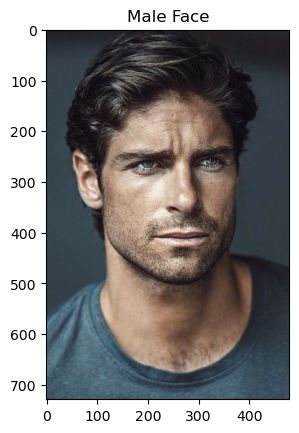

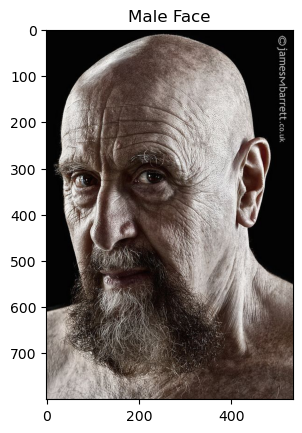

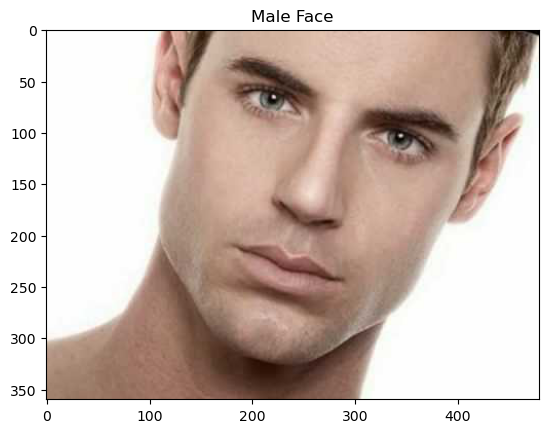

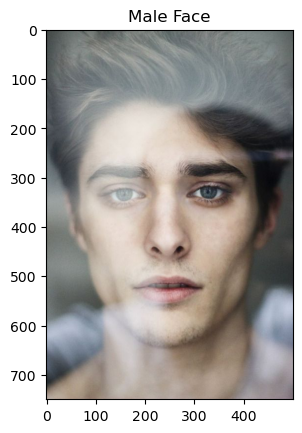

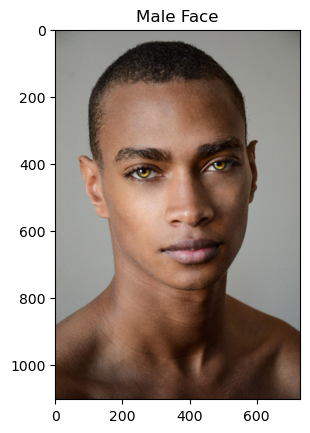

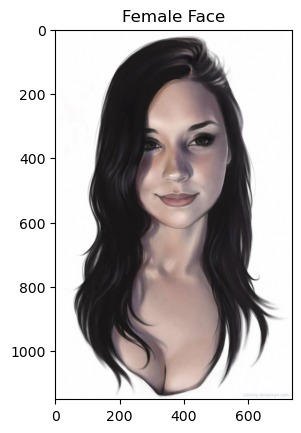

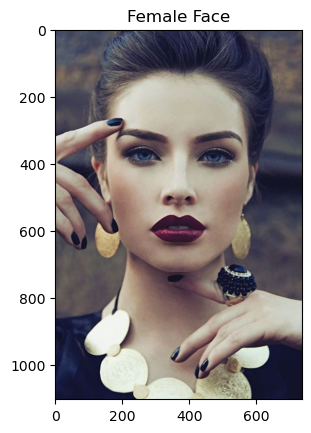

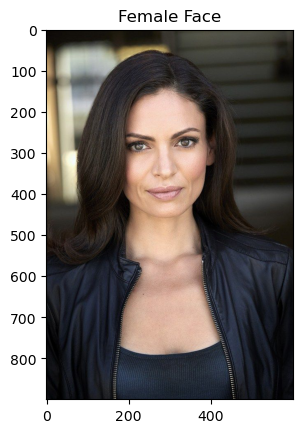

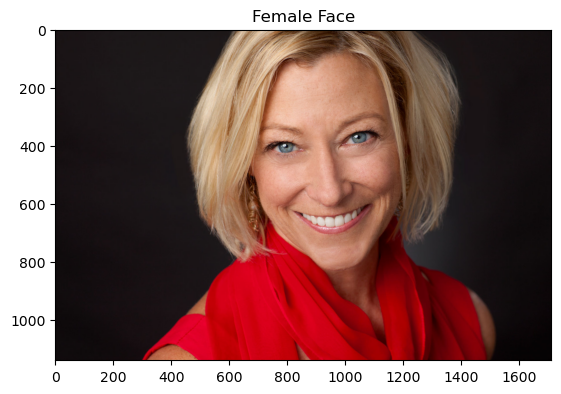

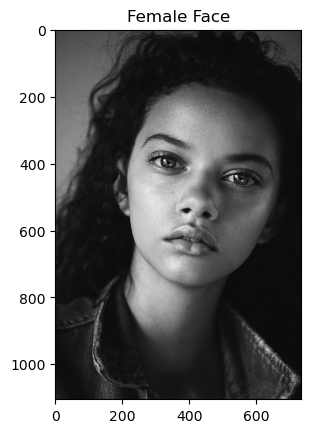

In [10]:
# Display sample male images
for img in sample_male_images:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Male Face")
    plt.show()

# Display sample female images
for img in sample_female_images:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Female Face")
    plt.show()


## Label Distribution

Number of male images: 2696
Number of female images: 2626


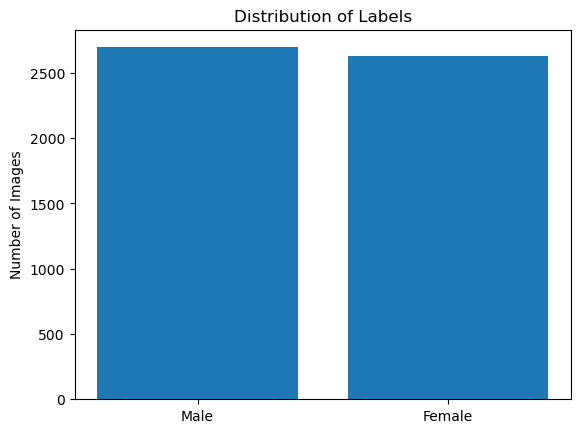

In [15]:
num_male_images = len(male_image_files)
num_female_images = len(female_image_files)

print(f"Number of male images: {num_male_images}")
print(f"Number of female images: {num_female_images}")

plt.bar(['Male', 'Female'], [num_male_images, num_female_images])
plt.ylabel('Number of Images')
plt.title('Distribution of Labels')
plt.show()


## Face Detection

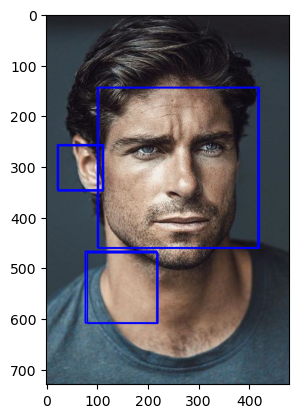

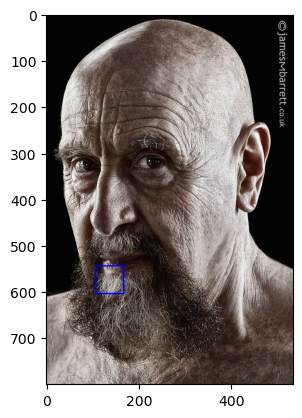

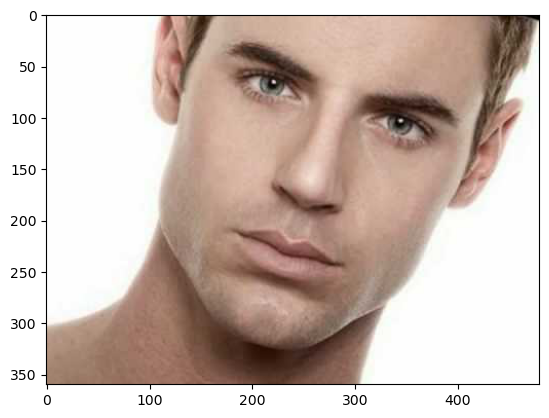

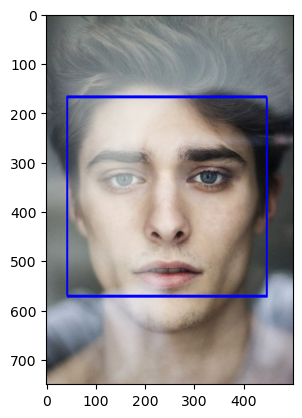

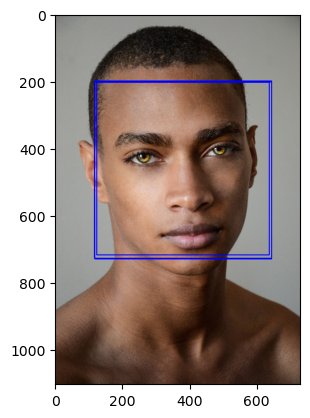

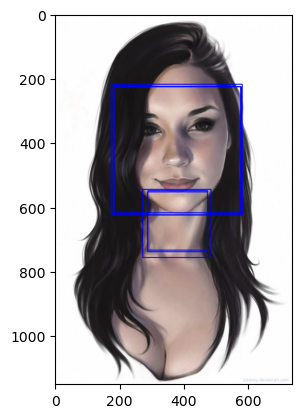

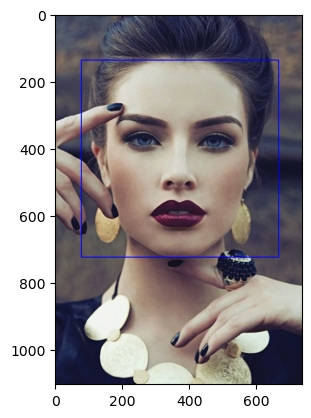

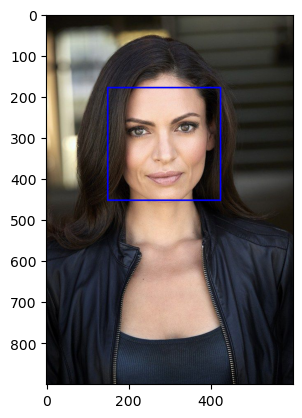

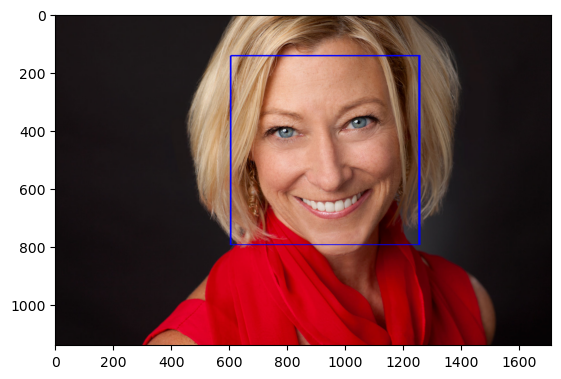

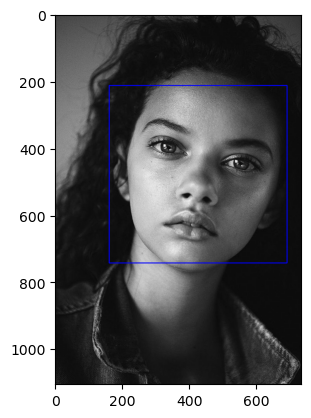

In [17]:
# My path to the haarcascades directory
haarcascades_path = '/home/john/miniconda3/envs/profme2/share/opencv4/haarcascades/'

face_cascade = cv2.CascadeClassifier(haarcascades_path + 'haarcascade_frontalface_default.xml')

for img in sample_male_images + sample_female_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


The built in OpenCV  model does not have consistent performance, given by the wrong box placement.

## Face Size and Position Analysis

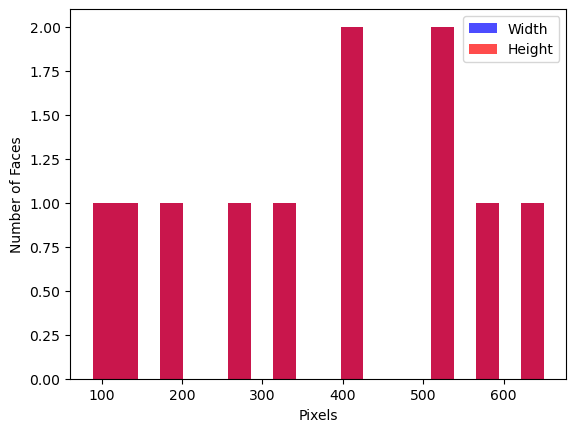

In [12]:
face_sizes = []

for img in sample_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_sizes.append((w, h))

# Plotting the distribution of face widths and heights
face_widths = [w for w, h in face_sizes]
face_heights = [h for w, h in face_sizes]

plt.hist(face_widths, bins=20, color='blue', alpha=0.7, label='Width')
plt.hist(face_heights, bins=20, color='red', alpha=0.7, label='Height')
plt.xlabel('Pixels')
plt.ylabel('Number of Faces')
plt.legend()
plt.show()

## Data Quality and Diversity

Checking for Duplicates

In [18]:
import hashlib

def dhash(image, hash_size=8):
    resized = cv2.resize(image, (hash_size + 1, hash_size))
    diff = resized[:, 1:] > resized[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

hashes = {}
duplicates = []

for image_path in all_image_paths:
    image = cv2.imread(image_path, 0)  # Load in grayscale
    h = dhash(image)
    if h in hashes:
        duplicates.append((image_path, hashes[h]))
    else:
        hashes[h] = image_path

print(f"Found {len(duplicates)} duplicate images.")

Found 3783 duplicate images.


In [19]:
# Removing the duplicates
for duplicate in duplicates:
    os.remove(duplicate[0])

In [ ]:
# Update the lists
male_files = [os.path.join(male_dataset_path, f) for f in os.listdir(male_dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
female_files = [os.path.join(female_dataset_path, f) for f in os.listdir(female_dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
all_image_paths = male_files + female_files

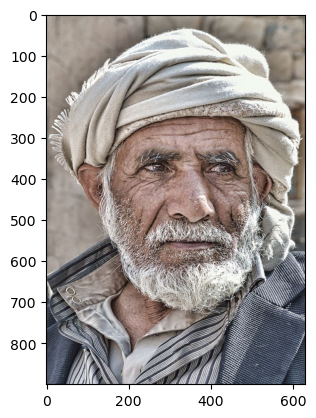

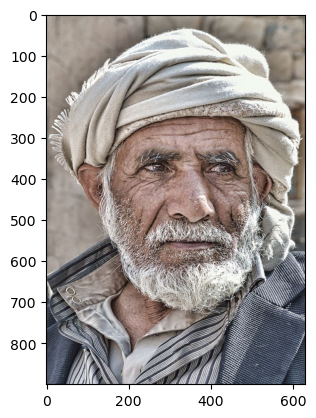

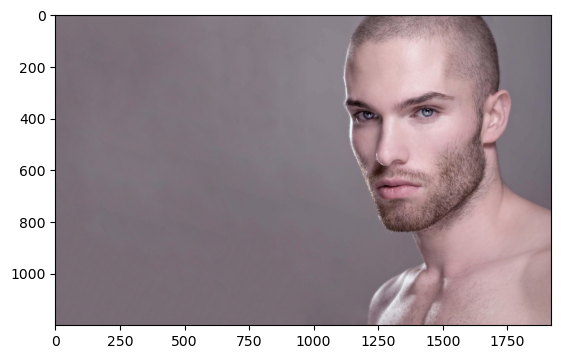

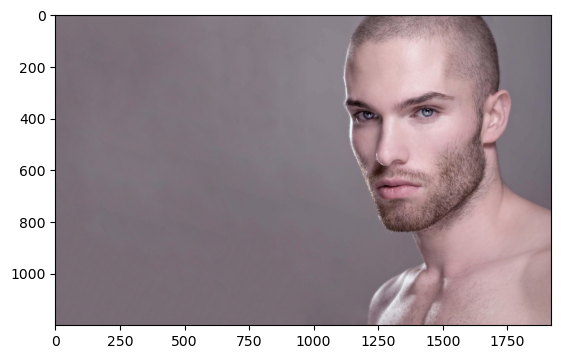

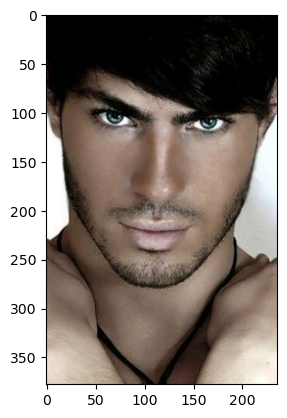

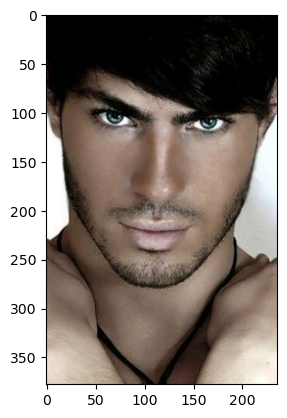

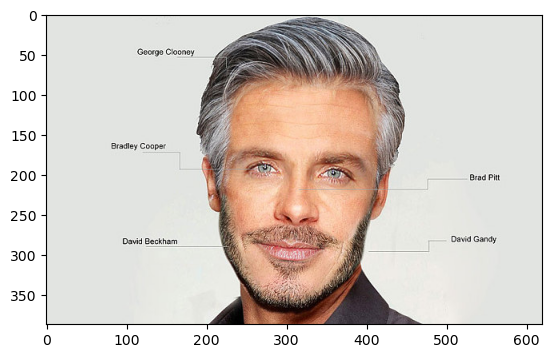

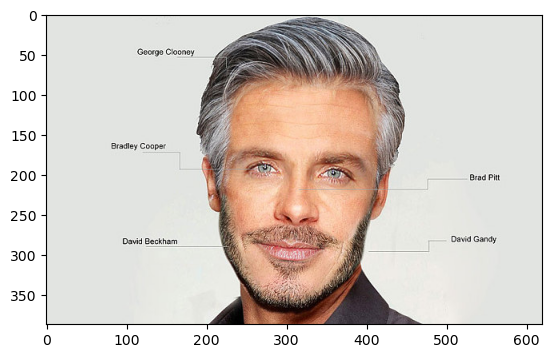

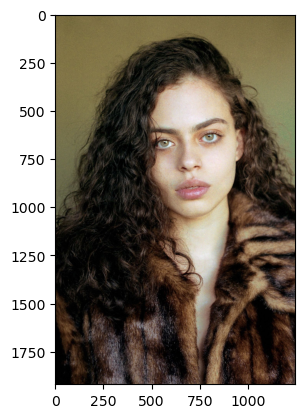

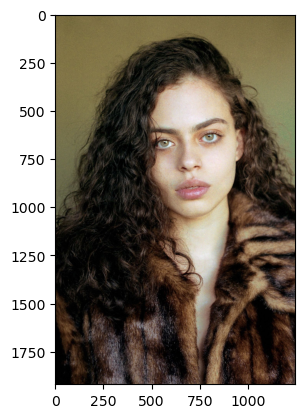

In [6]:
male_blurry_images = []
female_blurry_images = []

for image_file in male_image_files:
    image_path = os.path.join(male_dataset_path, image_file)
    image = cv2.imread(image_path, 0)  # Load in grayscale
    if variance_of_laplacian(image) < 100:  # Threshold can be adjusted
        male_blurry_images.append(image_path)

for image_file in female_image_files:
    image_path = os.path.join(female_dataset_path, image_file)
    image = cv2.imread(image_path, 0)  # Load in grayscale
    if variance_of_laplacian(image) < 100:  # Threshold can be adjusted
        female_blurry_images.append(image_path)

print(f"Found {len(male_blurry_images)} blurry male images.")
print(f"Found {len(female_blurry_images)} blurry female images.")


In [7]:
# Remove the duplicate images
for dup in duplicates:
    os.remove(dup[0])

In [8]:
# Viewing how many images are left
all_files = os.listdir(dataset_path)
print(len(all_files))

3494


In [10]:
# Update image files list
image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]

Checking for Low-Quality Images

In [11]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

blurry_images = []

for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path, 0)  # Load in grayscale
    if variance_of_laplacian(image) < 100:  # Threshold can be adjusted
        blurry_images.append(image_path)

print(f"Found {len(blurry_images)} blurry images.")

Found 913 blurry images.


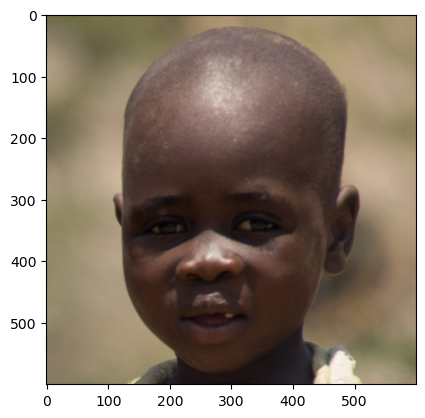

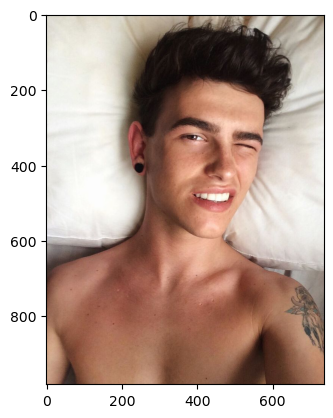

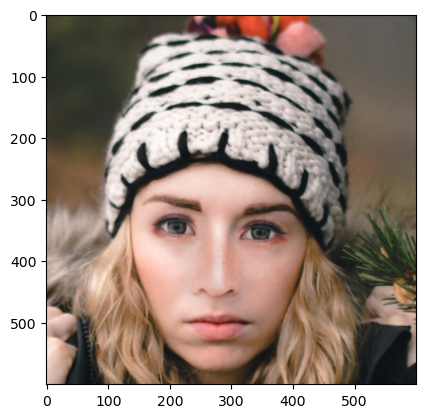

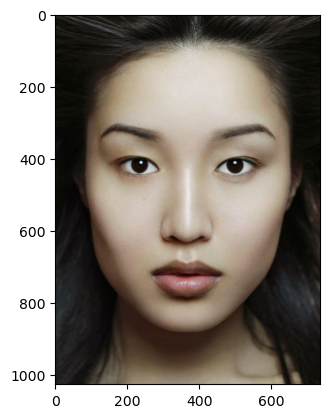

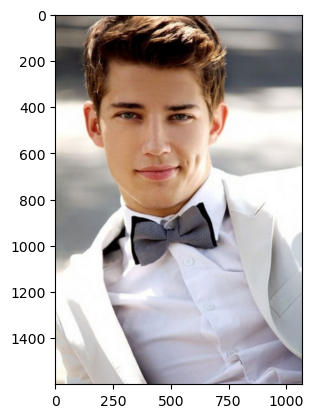

In [12]:
# Viewing the blurry images
for image_path in blurry_images[:5]:
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

They're not too blurry, I think it's fine to leave them in.